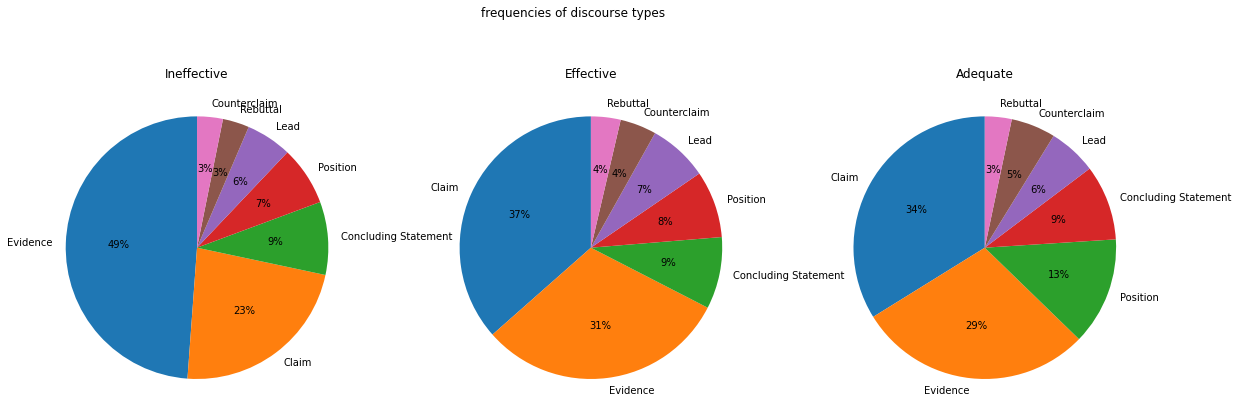

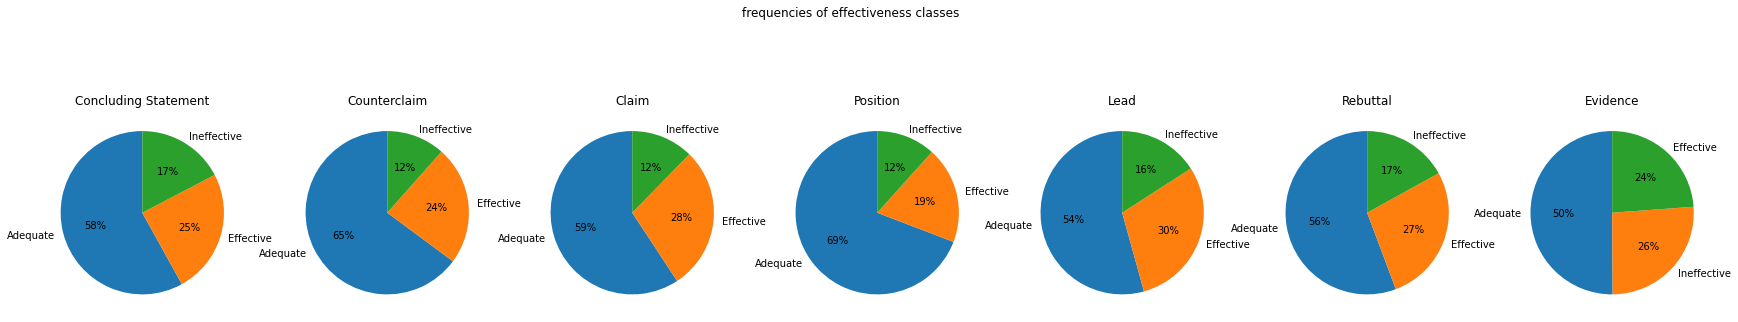

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("feedback-prize-effectiveness/train.csv")
discourse_types = set(data["discourse_type"])
effectiveness_classes = set(data["discourse_effectiveness"])

fig_pies, axs_pies = plt.subplots(1, len(effectiveness_classes))
fig_pies.suptitle('frequencies of discourse types')
for i, ec in enumerate(effectiveness_classes):
    freq = data[data.discourse_effectiveness == ec]['discourse_type'].value_counts()
    freq.plot.pie(ax=axs_pies[i], title=ec, autopct='%1.0f%%', figsize=(20, 7), ylabel='', startangle=90)

fig, axs = plt.subplots(1, len(discourse_types))
fig.suptitle('frequencies of effectiveness classes')
for i, dt in enumerate(discourse_types):
    freq = data[data.discourse_type == dt]['discourse_effectiveness'].value_counts()
    freq.plot.pie(ax=axs[i], title=dt, autopct='%1.0f%%', figsize=(30, 6), ylabel='', startangle=90)


In [2]:
data['len_chars'] = [len(text) for text in data['discourse_text']]

Average length (chars)


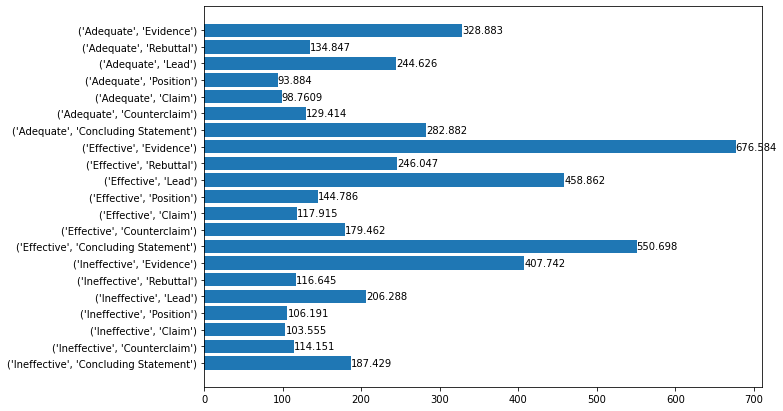

In [3]:
mean_len_char = {}
for de, dt in [(de, dt) for de in effectiveness_classes for dt in discourse_types]:
    mean_len_char[de, dt] = data[(data.discourse_effectiveness == de) & (data.discourse_type == dt)]['len_chars'].mean()
    # print('mean_len(', de, ', ', dt, ') = ', mean_len_char[de, dt], sep='')

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.barh(list(map(str, list(mean_len_char.keys()))), mean_len_char.values())
ax.bar_label(bars)
print("Average length (chars)")

In [4]:
import os

resource_dir = "goldstandard-clusters"
b_files = [directory+'/'+file for directory, _, files in os.walk(resource_dir) for file in files]
data_b = pd.concat([pd.read_csv(b_file) for b_file in b_files])
data['discourse_id_b'] = [data_b[(data_b.id == eid) & (data_b.discourse_text == dt)]['discourse_id'].values[0]
                            for (_, eid, dt) in data[['essay_id', 'discourse_text']].itertuples()]
data.to_csv('data_extended.csv')

IndexError: index 0 is out of bounds for axis 0 with size 0